In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('insurance_data.csv')
def csv_to_python_list(column):
    return df[str(column)]

In [53]:
list_of_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
age = csv_to_python_list('age')
sex = csv_to_python_list('sex')
bmi = csv_to_python_list('bmi')
children = csv_to_python_list('children')
smoker = csv_to_python_list('smoker')
region = csv_to_python_list('region')
charges = csv_to_python_list('charges')

In [54]:
class Patient_Data:
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges
    def analyze_Sex(self):
        self.malecount = 0
        self.femalecount = 0
        for entry in self.sex:
            if entry == 'male':
                self.malecount += 1
            else:
                self.femalecount += 1
        return self.malecount, self.femalecount
    def average_bmi(self):
        self.totalbmi = 0
        for entry in self.bmi:
            self.totalbmi += entry
        return self.totalbmi//self.bmi.count()
    def smoker_count(self):
        self.smokercount = 0
        self.nonsmokercount = 0
        for entry in self.smoker:
            if entry == 'yes':
                self.smokercount += 1
            else:
                self.nonsmokercount += 1
        return self.smokercount, self.nonsmokercount
    def seperate_data_by_sex(self, category):
        for entry in self.sex:
            tempmalelist = []
            tempfemalelist = []
            if entry == 'male':
                tempmalelist.append(self.category[self.sex.index(entry)])
            else:
                tempfemalelist.append(self.category[self.sex.index(entry)])
        return tempmalelist, tempfemalelist
    def generate_dictionary(self):
        self.patient_dictionary = {}
        self.patient_dictionary.update({'age':self.age, 'sex': self.sex, 'bmi': self.bmi, 'children': self.children, 'smoker': self.smoker, 'region': self.region, 'charges': self.charges})
    def average_charge(self):
        self.totalcharges = 0
        for entry in self.charges:
            self.totalcharges += entry
        return self.totalcharges//self.charges.count()


In [55]:
patient_Stats = Patient_Data(age, sex, bmi, children, smoker, region, charges)

In [56]:
patient_Stats_Dictionary = patient_Stats.generate_dictionary()

In [57]:
mcount, fcount = patient_Stats.analyze_Sex()
print("There are {mcount} males and {fcount} females in this dataset.".format(mcount=mcount, fcount=fcount))

There are 676 males and 662 females in this dataset.


In [58]:
avgbmi = patient_Stats.average_bmi()
print("The average BMI of this dataset is {avgbmi}.".format(avgbmi=avgbmi))

The average BMI of this dataset is 30.0.


In [59]:
smokercount, nonsmokercount = patient_Stats.smoker_count()
print("The amount of smokers in this dataset is {scount}.  The amount of non-smokers in this dataset is {nonscount}.".format(scount = smokercount, nonscount = nonsmokercount))

The amount of smokers in this dataset is 274.  The amount of non-smokers in this dataset is 1064.


In [60]:
avgcost = patient_Stats.average_charge()
print("The average insurance cost of an individual in this dataset is {avcost}.".format(avcost = avgcost))

The average insurance cost of an individual in this dataset is 13270.0.


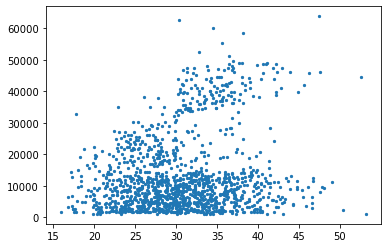

In [61]:
fig, ax = plt.subplots()

ax.scatter(patient_Stats.bmi, patient_Stats.charges, s=5)

plt.show()

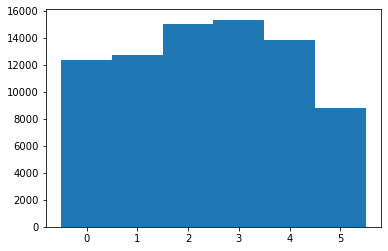

In [62]:
children_charge_dictionary = {}
i=0
while i in range(len(patient_Stats.children)):
    if patient_Stats.children[i] not in children_charge_dictionary:
        children_charge_dictionary[patient_Stats.children[i]] = [patient_Stats.charges[i]]
    else:
        children_charge_dictionary[patient_Stats.children[i]].append(patient_Stats.charges[i])
    i+=1
children_charge_averages = []
i=0
while i < 6:
    children_charge_averages.append(np.mean(children_charge_dictionary[i]))
    i+=1
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5],children_charge_averages , width=1)
plt.show()